# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

# Question 1

Firstly the parameters are stored in a dict. Secound the utility function is defined. Next the solution is solved for consumption, housing quality and utility.

In [1]:
from scipy import optimize

# dictionary of exogenous variables
param_dict = {'phi'  : 0.3,
              'eps'  : 0.5,
              'r'    : 0.03,
              'tau_g': 0.012,
              'tau_p': 0.004,
              'p_bar': 3,
             }
#money on hand
m=0.5

#utility function
def utility_function(c, h, param_dict):
    '''
    utility function for consuption and houseing 
    '''
    return (c**(1-param_dict['phi']))*(h**param_dict['phi'])



#the value of choice function
def value_of_choice(x,param_dict,m):
    
    '''
    createts vectors for c and h and return then as utility levels
    '''
    
    # note: x is a vector
    c = x[0]
    h = x[1]
 
    return -utility_function(c,h,param_dict)

# constraints (violated if negative)

constraints = ({'type': 'ineq', 'fun': lambda x:  m - (x[0] + param_dict['r']*x[1] 
                                                      + param_dict['tau_g']*x[1]*param_dict['eps']
                                                      + param_dict['tau_p']*max(x[1]*param_dict['eps']
                                                                                -param_dict['p_bar'],0))})

#  solving the function
def solver(m, param_dict):
    
    '''
    solves the optimization for consumtion houseing
    
    '''
    initial_guess = [m/2,m/2]
    sol_case = optimize.minimize(
    value_of_choice,initial_guess,args=(param_dict,m),
    method='SLSQP',constraints=constraints)
# d. unpack solution
    c = sol_case.x[0]
    h = sol_case.x[1]
    u = utility_function(c, h, param_dict)
    return c, h, u

#calling the results
results = solver(m, param_dict)

print(f'The optimal consumption level is: {results[0]:.4f}')

print(f' The optimal house quality is: {results[1]:.4f}')

print(f' The utility is: {results[2]:.4f}')


The optimal consumption level is: 0.3500
 The optimal house quality is: 4.1653
 The utility is: 0.7358


# Question 2

First, datacontainers are defined. Secound, solving the function using a loop for values between 0.4 and 2.5 and stored in the datacontainers. Lastly the figure plots the optimal consumption and housing quality for the different amount of money.

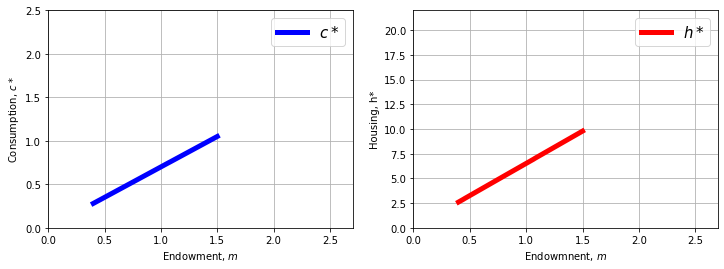

In [11]:
import numpy as np
import matplotlib.pyplot as plt # baseline modul

#Data containers
c_star = []
h_star = []
x_axis = []
# loop 100 values between 0.4 and 2.5, 2.5 included
for m in np.linspace(0.4,1.5,num=100,endpoint=True):

#  solving the function
    results2 = solver(m, param_dict)


    #appending the results to the data containers 
    c_star.append(results2[0])
    h_star.append(results2[1])
    x_axis.append(m)
    

#initialising the figuere
fig = plt.figure(figsize=(12,4))

# Optimal consumption
ax = fig.add_subplot(1,2,1)
ax.plot(x_axis, c_star, color='blue', label="$c*$", linewidth=5)
ax.set_ylabel('Consumption, $c*$')
ax.set_xlabel('Endowment, $m$')

# adding legend
plt.legend(loc='best', fontsize=15)

# costumizing end and begining of x and y axis
ax.set_xlim([0,2.7])
ax.set_ylim([0,2.5])
ax.grid(True)


# Optimal housing
ax = fig.add_subplot(1,2,2)
ax.plot(x_axis, h_star, color='red', label="$h*$", linewidth=5)
ax.set_ylabel('Housing, h*')
ax.set_xlabel('Endowmnent, $m$')

# adding legend
plt.legend(loc='best', fontsize=15)

# costumizing end and begining of x and y axis.
ax.set_xlim([0,2.7])
ax.set_ylim([0,22])
ax.grid(True)

# Question 3

Setting the number of observations, N, to 10 000 and the seed to 1.
Defining the tax function, that takes in house prices and tax rates.
drawing 10000 values of m from the lognormal(-0.4,0.35) distribution.
Saving the taxes payed in a data container, then calculation the average tax payment.



In [3]:
#Number of observations
N = 10000
# Setting the seed
np.random.seed(seed=1)

#Defining the tax function
def tax_func(h, param_dict):
    return param_dict['tau_g']*h*param_dict['eps']+ param_dict['tau_p']*max(h*param_dict['eps']-param_dict['p_bar'],0)

#generating values for cash on hand, from the log normal distribution with mean -0,4 and variance 0.35
M = np.random.lognormal(mean=-0.4,sigma = 0.35,size=10000)

#container for the individuals taxpayer
individual_i = []
#h_star container for plotting later
h_star = []
#looping the cash on hand values though the solver for c and h
for m in M:
    
    results3 = solver(m, param_dict)
    h_star.append(results3[1])

#calculating the tax for each iteration
    tax = tax_func(results3[1], param_dict)
#appending the tax to the container
    individual_i.append(tax)

#Calculating the revenue
rev= sum(individual_i)   
avg_tax=rev/N
print(f' The average tax is: {avg_tax:.4f}')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


363.1504591924506
0.03631504591924506


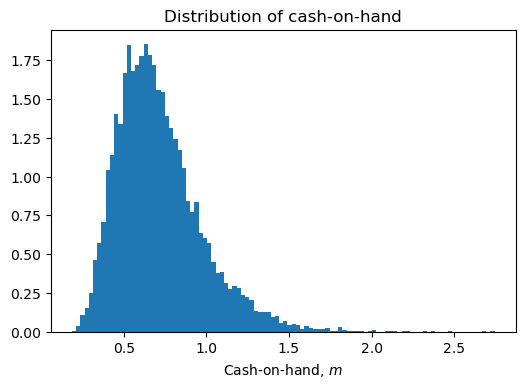

In [4]:
#plotting the distribution of cash on hand
fig = plt.figure(dpi=100) #Dots per inches (dpi) determines how many pixels the figure comprises. The default dpi in matplotlib is 100.
ax = fig.add_subplot(1,1,1)
plt.title("Distribution of cash-on-hand")
ax.hist(M,bins=100,density=True,label='normal')
ax.set_xlabel('Cash-on-hand, $m$');

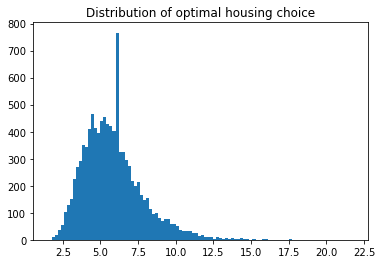

In [5]:
#plotting distribution of optimal house 
plt.hist(h_star, bins=100)
plt.title("Distribution of optimal housing choice")
plt.show()

We opserve a lot of density around house spending at 6 million, could be coused by bundging. 
As Progressive tax systems create kinks in the budget line. This creates this excess mass.

# Question 4

Opdating the parameter, and solving for c and h and calculating the average tax payment as in question 3.

In [8]:
# opdating the parameters.
param_dict['eps'] = 0.8
param_dict['tau_g'] = 0.01
param_dict['tau_p'] = 0.009
param_dict['p_bar'] = 8

#solving as in Q3
individual_i2 = []

for m in M:
    
#solving
    results4 = solver(m, param_dict)

    tax2 = tax_func(results4[1], param_dict)
    individual_i2.append(tax2)

rev2= sum(individual_i2)   
avg_tax2=rev2/N
print(f' The average taxpayment is: {avg_tax2:.4f}')

 The average taxpayment is: 0.0450


# Question 5

Calculating the minimum distance between the tax revenue between the first and the secound tax regime for various tau_g values. 

In [10]:
######################################################
# Takes a lot of time to run 
#####################################################



#creating a vector with 50 values between 0 and 0.02.
tau_g_vec = np.linspace(0,0.02,50)


#creating data containers for the revenue and tau_g values
rev_li =[]
tau_g_li =[]

#a loop for iterating the 100 values of tau_g and placing them in the optimization and calculationg the tax revenue
for i,tau_g in enumerate(tau_g_vec):
    # replacing tau_g in the param_dict with the current iteration 
    param_dict['tau_g'] = tau_g
        
    individual = []

    for m in M:

        results5 = solver(m, param_dict)

        tax_last =  tax_func(results5[1], param_dict)
        individual.append(tax_last)
    r_ =sum(individual)
    r = r_/len(individual)
    tau_g_li.append(tau_g)
    # calculationg the difference between the average tax from question 3 and the average tax 
    #from the current iteration of tau_g in abselute values.
    rev_li.append(abs(avg_tax-r))

#zipping the tau_g iteration with the revenue difference assosiated with it
c = list(zip(tau_g_li, rev_li))
#Finding the tau_g that provides the same revenue as in q3.
optimal_tau_g = min(c, key = lambda t: t[1])
print(f' The tau g that provides the same tax revenue is: {optimal_tau_g:.4f}')

(0.007755102040816327, 0.0003269781533141794)


In [15]:
individual = []
param_dict['tau_g'] = optimal_tau_g[0]
for m in M:
    
#solving
    res = solver(m, param_dict)

    t = tax_func(res[1], param_dict)
    individual.append(t)

last= sum(individual)   
at=last/len(M)
print(f' The average taxpayment is: {at:.4f}')

 The average taxpayment is: 0.0366


# Conclusion

ADD CONCISE CONLUSION.